In [1]:
import os
import pandas as pd
import numpy as np
from nilearn.glm.first_level import make_first_level_design_matrix
from nilearn.glm import expression_to_contrast_vector
from nilearn import plotting
from glob import glob
from pyrelimri import similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
grpmap_path = '/scratch.global/mdemiden/mid_rt_mod/group/ses-baselineYear1Arm1/session'

# group level contrast estimates
contrasts = [
    # anticipatory contrasts for cue-model
    'LRew-Neut', 'ARew-Neut', 'LPun-Neut', 'APun-Neut',
    # feedback contrasts
    'ARewHit-ARewMiss', 'LRewHit-LRewMiss', 'APunHit-APunMiss',
    'LPunHit-LPunMiss', 'LRewHit-LNeutHit'
]
# rt versus non-rt model
models = ['Cue-rt', 'Cue-None']

In [46]:
grp_imgs = glob(f'{grpmap_path}/subs-100_*_stat-tstat.nii.gz')

In [48]:
pairwise_vals = similarity.pairwise_similarity(nii_filelist=grp_imgs, mask = None, similarity_type = 'spearman')

In [145]:
pairwise_vals['similar_coef_r'] = pd.to_numeric(pairwise_vals['similar_coef']).round(3)
pairwise_vals[['img1','img2']] = pairwise_vals['image_labels'].str.split('~', expand=True)
pairwise_vals['img1_short'] = pairwise_vals['img1'].str.split('_').apply(lambda x: x[3:5]).apply(lambda x: '_'.join(x))
pairwise_vals['img2_short'] = pairwise_vals['img2'].str.split('_').apply(lambda x: x[3:5]).apply(lambda x: '_'.join(x))

In [146]:
pairwise_vals

,similar_coef,image_labels,similar_coef_r,short_lab,sample_pairs,img1,img2,img1_short,img2_short
0,0.8496325075586572,subs-100_ses-baselineYear1Arm1_task-MID_contra...,0.850,"[contrast-APun-Neut, mod-Cue-None]",s ~ u ~ b ~ s ~ - ~ 1 ~ 0 ~ 0 ~ _ ~ s ~ e ~ s ...,subs-100_ses-baselineYear1Arm1_task-MID_contra...,subs-100_ses-baselineYear1Arm1_task-MID_contr...,contrast-APun-Neut_mod-Cue-None,contrast-APun-Neut_mod-Cue-rt
1,0.02071753601420323,subs-100_ses-baselineYear1Arm1_task-MID_contra...,0.021,"[contrast-APun-Neut, mod-Cue-None]",s ~ u ~ b ~ s ~ - ~ 1 ~ 0 ~ 0 ~ _ ~ s ~ e ~ s ...,subs-100_ses-baselineYear1Arm1_task-MID_contra...,subs-100_ses-baselineYear1Arm1_task-MID_contr...,contrast-APun-Neut_mod-Cue-None,contrast-APunHit-APunMiss_mod-Cue-None
2,0.39826799450492173,subs-100_ses-baselineYear1Arm1_task-MID_contra...,0.398,"[contrast-APun-Neut, mod-Cue-None]",s ~ u ~ b ~ s ~ - ~ 1 ~ 0 ~ 0 ~ _ ~ s ~ e ~ s ...,subs-100_ses-baselineYear1Arm1_task-MID_contra...,subs-100_ses-baselineYear1Arm1_task-MID_contr...,contrast-APun-Neut_mod-Cue-None,contrast-APunHit-APunMiss_mod-Cue-rt
3,0.9256784505712211,subs-100_ses-baselineYear1Arm1_task-MID_contra...,0.926,"[contrast-APun-Neut, mod-Cue-None]",s ~ u ~ b ~ s ~ - ~ 1 ~ 0 ~ 0 ~ _ ~ s ~ e ~ s ...,subs-100_ses-baselineYear1Arm1_task-MID_contra...,subs-100_ses-baselineYear1Arm1_task-MID_contr...,contrast-APun-Neut_mod-Cue-None,contrast-ARew-Neut_mod-Cue-None
4,0.7311949649639046,subs-100_ses-baselineYear1Arm1_task-MID_contra...,0.731,"[contrast-APun-Neut, mod-Cue-None]",s ~ u ~ b ~ s ~ - ~ 1 ~ 0 ~ 0 ~ _ ~ s ~ e ~ s ...,subs-100_ses-baselineYear1Arm1_task-MID_contra...,subs-100_ses-baselineYear1Arm1_task-MID_contr...,contrast-APun-Neut_mod-Cue-None,contrast-ARew-Neut_mod-Cue-rt
...,...,...,...,...,...,...,...,...,...
148,0.41966574138141294,subs-100_ses-baselineYear1Arm1_task-MID_contra...,0.420,"[contrast-LRewHit-LNeutHit, mod-Cue-None]",s ~ u ~ b ~ s ~ - ~ 1 ~ 0 ~ 0 ~ _ ~ s ~ e ~ s ...,subs-100_ses-baselineYear1Arm1_task-MID_contra...,subs-100_ses-baselineYear1Arm1_task-MID_contr...,contrast-LRewHit-LNeutHit_mod-Cue-None,contrast-LRewHit-LRewMiss_mod-Cue-None
149,0.4702954723636822,subs-100_ses-baselineYear1Arm1_task-MID_contra...,0.470,"[contrast-LRewHit-LNeutHit, mod-Cue-None]",s ~ u ~ b ~ s ~ - ~ 1 ~ 0 ~ 0 ~ _ ~ s ~ e ~ s ...,subs-100_ses-baselineYear1Arm1_task-MID_contra...,subs-100_ses-baselineYear1Arm1_task-MID_contr...,contrast-LRewHit-LNeutHit_mod-Cue-None,contrast-LRewHit-LRewMiss_mod-Cue-rt
150,0.4191887392422868,subs-100_ses-baselineYear1Arm1_task-MID_contra...,0.419,"[contrast-LRewHit-LNeutHit, mod-Cue-rt]",s ~ u ~ b ~ s ~ - ~ 1 ~ 0 ~ 0 ~ _ ~ s ~ e ~ s ...,subs-100_ses-baselineYear1Arm1_task-MID_contra...,subs-100_ses-baselineYear1Arm1_task-MID_contr...,contrast-LRewHit-LNeutHit_mod-Cue-rt,contrast-LRewHit-LRewMiss_mod-Cue-None
151,0.4680256850466235,subs-100_ses-baselineYear1Arm1_task-MID_contra...,0.468,"[contrast-LRewHit-LNeutHit, mod-Cue-rt]",s ~ u ~ b ~ s ~ - ~ 1 ~ 0 ~ 0 ~ _ ~ s ~ e ~ s ...,subs-100_ses-baselineYear1Arm1_task-MID_contra...,subs-100_ses-baselineYear1Arm1_task-MID_contr...,contrast-LRewHit-LNeutHit_mod-Cue-rt,contrast-LRewHit-LRewMiss_mod-Cue-rt


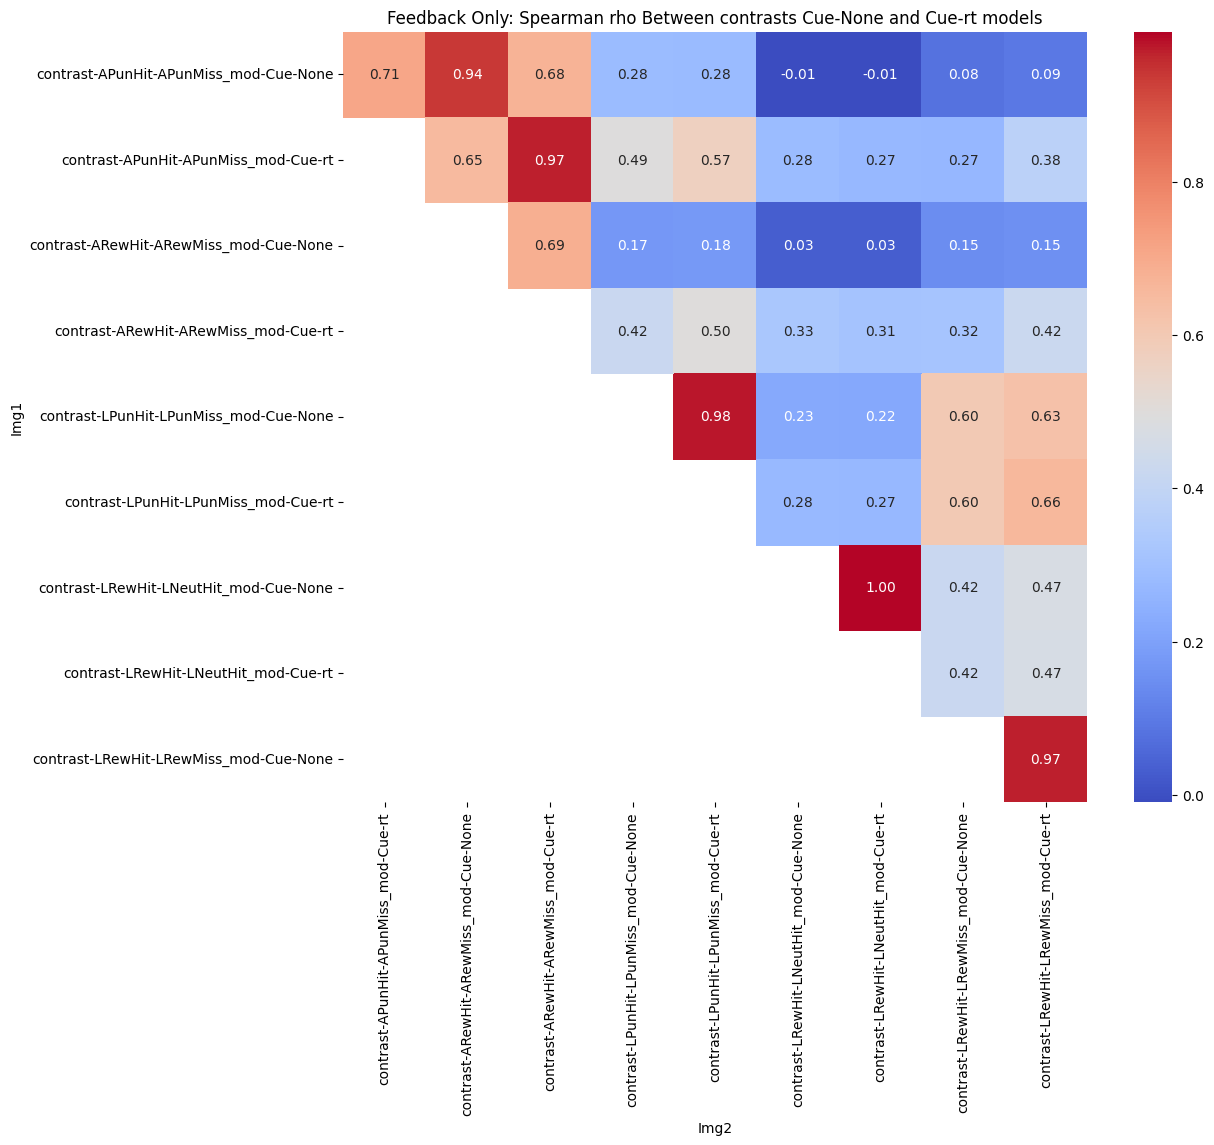

In [149]:
filtered_feedback = pairwise_vals[(pairwise_vals['img1_short'].str.contains('Hit|Miss')) & (pairwise_vals['img2_short'].str.contains('Hit|Miss'))]

# Create correlation matrix from the filtered DataFrame
fb_matrix = filtered_feedback.pivot(index='img1_short', columns='img2_short', values='similar_coef_r')

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(fb_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Feedback Only: Spearman rho Between contrasts Cue-None and Cue-rt models')
plt.xlabel('Img2')
plt.ylabel('Img1')
plt.show()

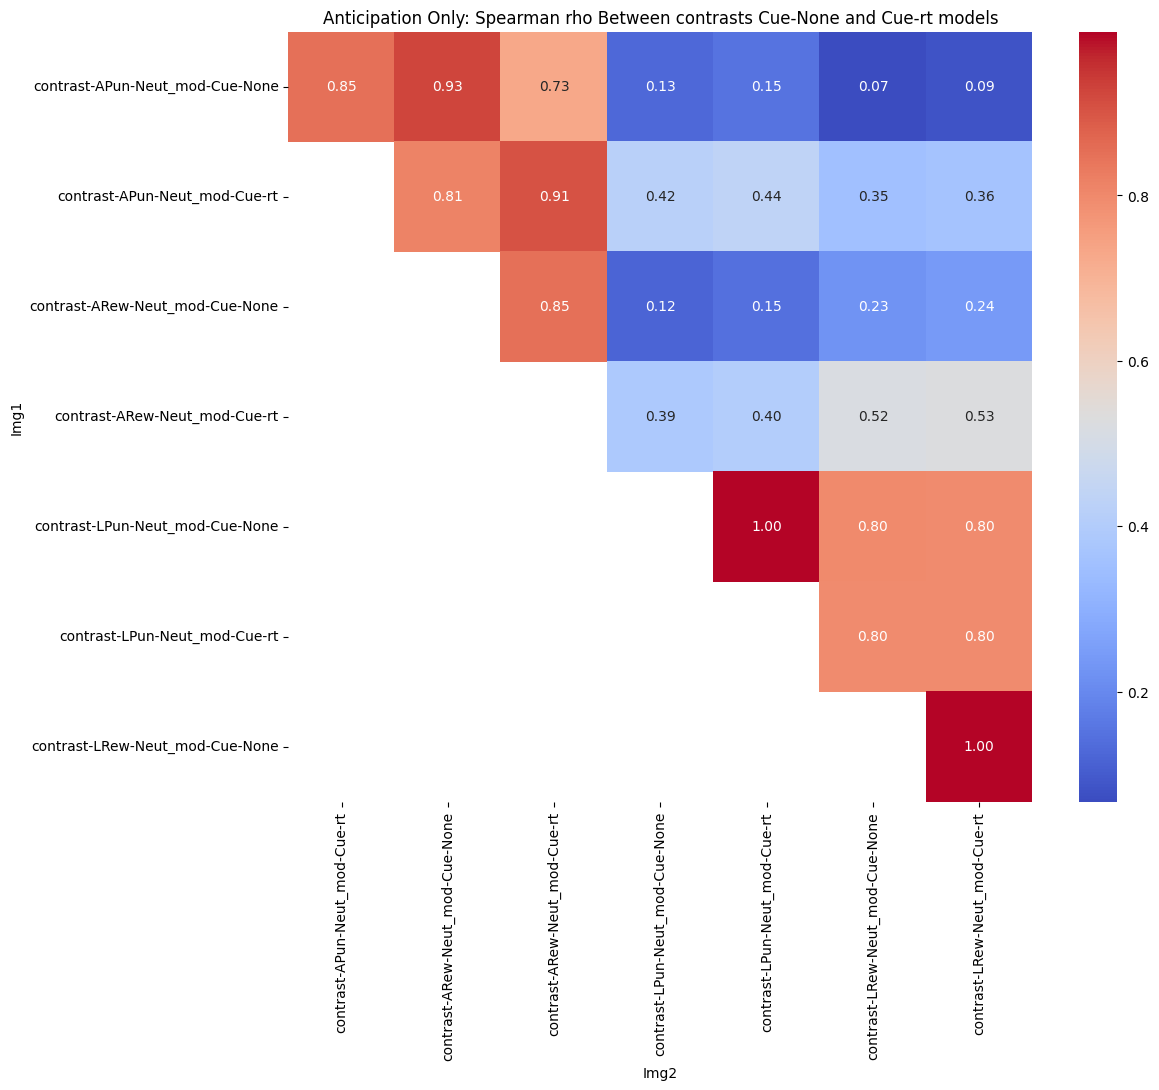

In [150]:
filtered_ant = pairwise_vals[~((pairwise_vals['img1_short'].str.contains('Hit|Miss')) | (pairwise_vals['img2_short'].str.contains('Hit|Miss')))]

# Create correlation matrix from the filtered DataFrame
ant_matrix = filtered_ant.pivot(index='img1_short', columns='img2_short', values='similar_coef_r')

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(ant_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Anticipation Only: Spearman rho Between contrasts Cue-None and Cue-rt models')
plt.xlabel('Img2')
plt.ylabel('Img1')
plt.show()

In [135]:
len(models) * len(contrasts)

18

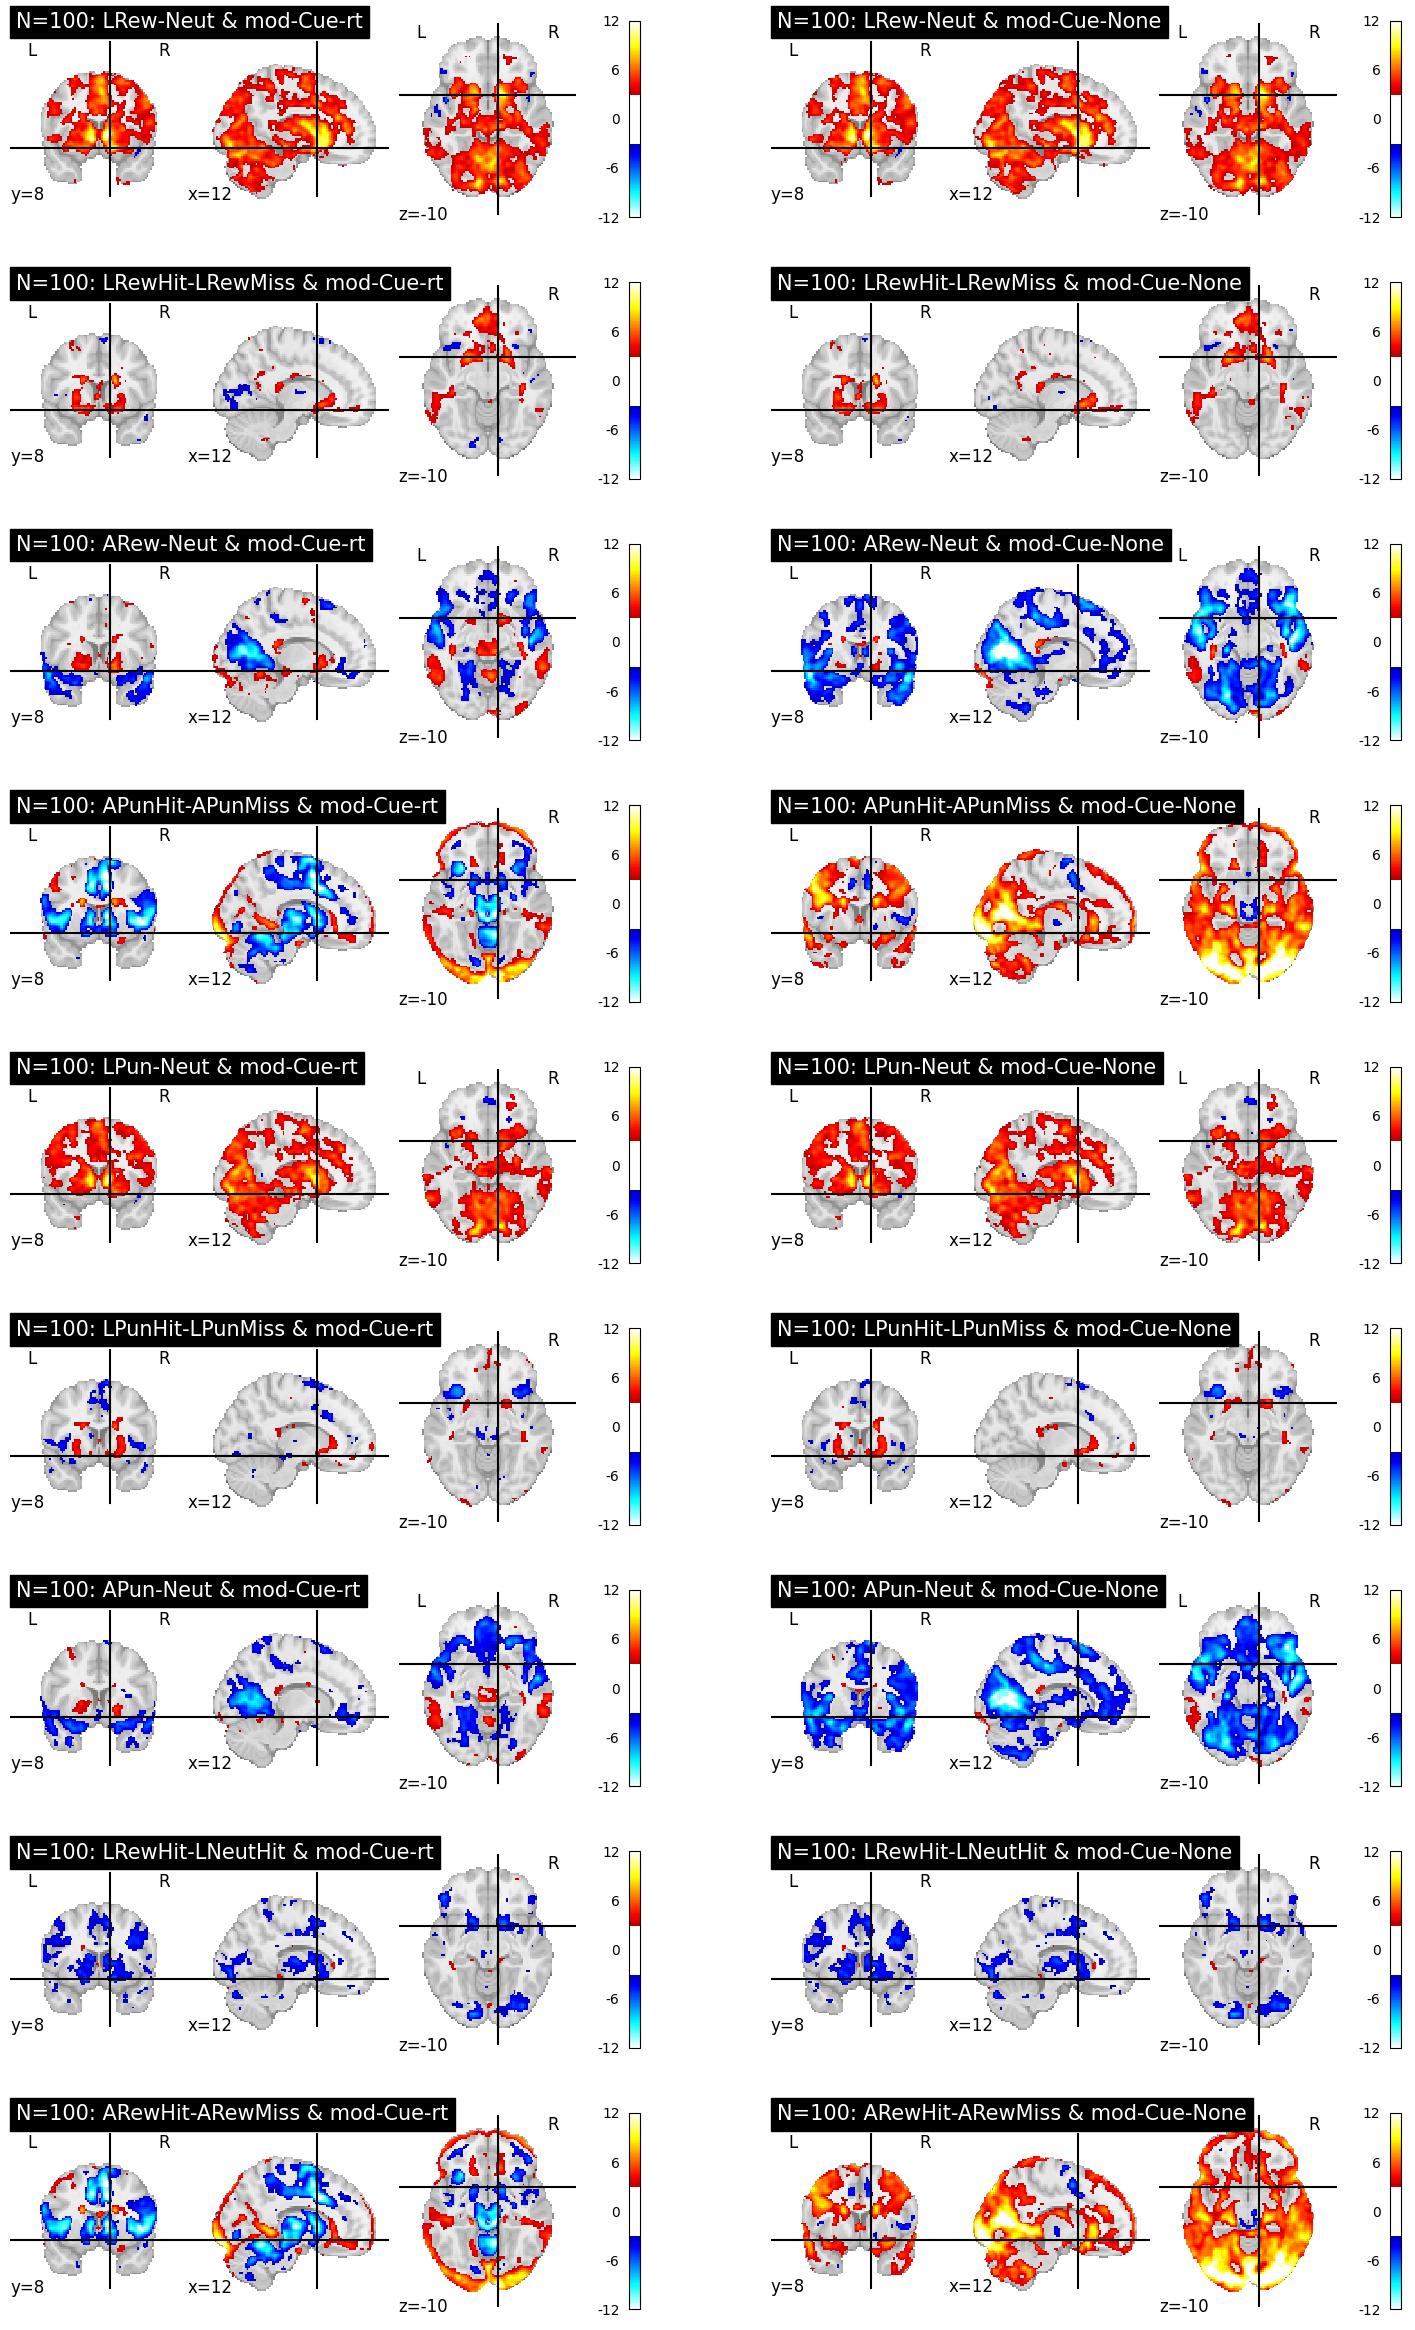

In [143]:
spec_coords = (12,8,-10)
tstat_thresh = 3.1
tstat_max = 12
n_cols = 2
n_rows = 9
fig, axes = plt.subplots(n_rows,n_cols, figsize=(18,30))

for mod in ['mod-Cue-rt', 'mod-Cue-None']:
    for i, con in enumerate(contrasts):
        con_img = glob(f'{grpmap_path}/subs-100_*{con}_{mod}_stat-tstat.nii.gz')[0]
        row = (i * 2) % n_rows  # Ensure row stays within the range of n_rows
        col = ['mod-Cue-rt', 'mod-Cue-None'].index(mod)
        plotting.plot_stat_map(stat_map_img=con_img, cut_coords=spec_coords,  # Right NAcc
                               display_mode="ortho",
                               title=f"N=100: {con} & {mod}", threshold=tstat_thresh, draw_cross=True,
                               vmax=tstat_max, colorbar=True,
                               axes=axes[row, col])

plt.show()

# Below is example to set up design matrix

Set paths and load the behavioral data for n = 1

In [2]:
dir_in = '/Users/michaeldemidenko/Downloads/2YearFollowUpYArm1_MID'
dir_out = '/Users/michaeldemidenko/Downloads'
beh_n1 = glob(f'{dir_in}/*_task-MID_run-01_events.tsv')[0]

In [3]:
events_df = pd.read_csv(beh_n1,sep='\t')
events_df.columns

Index(['Subject', 'Handedness', 'Run', 'SubTrial', 'Condition',
       'Cue.OnsetTime', 'Cue.Duration', 'Anticipation.Duration',
       'Anticipation.OnsetTime', 'Probe.Duration', 'Probe.OnsetTime',
       'Probe.RESP', 'Result', 'prbacc', 'prbrt', 'OverallRT', 'meanrt',
       'moneyamt', 'ResponseCheck', 'Feedback.OnsetTime', 'FeedbackDuration',
       'SessionDate', 'TriggerTime', 'TriggerTimeAlt', 'DiffTriggerTimes'],
      dtype='object')

In [4]:
events_df[['Probe.Duration', 'Probe.OnsetTime','OverallRT']]

,Probe.Duration,Probe.OnsetTime,OverallRT
0,0.326,6.00,263.0
1,0.326,13.51,257.0
2,0.326,19.52,219.0
3,0.326,25.03,201.0
4,0.276,33.04,268.0
5,0.276,38.55,281.0
6,0.276,46.06,213.0
7,0.276,51.57,208.0
8,0.246,57.08,NaN
9,0.246,63.59,191.0


Question...

ABCD - 
Reward Hit - Reward Miss ($5/0.20)
Reward Hit - Neutral hit 

If RT effect - adjust If contrast for feedback --> decreases effect = okay?

First: Create a more consistent hit/miss Feedback column based on probe accuracy

In [5]:
events_df['Feedback.Response'] = np.where(events_df['prbacc'] == 1.0,
                                          events_df['Condition'] + '_hit',
                                          events_df['Condition'] + '_miss')

In [6]:
events_df[['Feedback.Response','OverallRT']].groupby('Feedback.Response').mean('OverallRT')

,OverallRT
Feedback.Response,
LgPun_hit,223.375000
LgPun_miss,258.000000
LgReward_hit,217.800000
LgReward_miss,255.333333
SmallPun_hit,215.000000
SmallPun_miss,262.000000
SmallReward_hit,235.800000
SmallReward_miss,234.250000
Triangle_hit,225.428571


Create stacked conditions, onsets and durations to be used in first level. 

In order of phases modeled:

Anticipation:
1. Condition
2. Cue.OnsetTime
3. Cue.Duration

Feedback:
1. Feedback.Response
2. Feedback.OnsetTime
3. Feedback.Duration

Two probe regressor:

Probe - Regressor 1: Probe.OnsetTime + Probe.duration

Prone_rt - Regressor 2: Probe.OnsetTime + OverallRT / 1000

Probe:
1. Constant probe cue
2. Probe.OnsetTime
3. Probe.Duration

Probe_rt:
1. Constant probe_rt label -- omit rows w/o response
2. Probe.OnsetTime -- omit rows w/o response
3. OverallRT -- duration is the RT time, omit rows w/o response (ms --> sec)



In [7]:
conditions = pd.concat([events_df.loc[:, "Condition"], 
                        events_df.loc[:, "Feedback.Response"],
                        pd.Series(["probe"] * len(events_df[['OverallRT','Probe.OnsetTime']])),
                        pd.Series(["probe_rt"] * len(events_df[['OverallRT','Probe.OnsetTime']].dropna()))
                       ], ignore_index=True)
onsets = pd.concat([events_df.loc[:, 'Cue.OnsetTime'], 
                    events_df.loc[:, "Feedback.OnsetTime"],
                    events_df.loc[:, "Probe.OnsetTime"],
                    events_df[['OverallRT','Probe.OnsetTime']].dropna()['Probe.OnsetTime']
                   ], ignore_index=True)
duration = pd.concat([events_df.loc[:, 'Cue.Duration'], 
                      events_df.loc[:, "FeedbackDuration"],
                      events_df.loc[:, "Probe.Duration"],
                      (events_df[['OverallRT','Probe.OnsetTime']].dropna()['OverallRT'])/1000
                     ], ignore_index=True)

# create pandas df with events
design_events = pd.DataFrame({
    'trial_type': conditions,
    'onset': onsets,
    'duration': duration
})

In [8]:
design_events

,trial_type,onset,duration
0,Triangle,2.02,2.000
1,SmallReward,8.04,2.000
2,LgPun,15.55,2.000
3,SmallReward,21.57,2.000
4,LgReward,27.07,2.000
...,...,...,...
188,probe_rt,281.44,0.235
189,probe_rt,289.45,0.211
190,probe_rt,296.96,0.217
191,probe_rt,303.97,0.301


Create nilean design matrix for n volumes + bold TR in MID ABCD w/o stc and spm model.
Subsequent versions will include dift models calculated by fmriprep + x,y,z + derivatives motion regressors

In [9]:
# vols / tr
num_volumes = 403
bold_tr = .800

# Using the BOLD tr and volumes to generate the frame_times: acquisition time in seconds
frame_times = np.arange(num_volumes) * bold_tr

design_matrix_mid = make_first_level_design_matrix(
    frame_times=frame_times,
    events=design_events,
    hrf_model='spm', drift_model=None, add_regs=None
    )

In [10]:
reorder_cols = ['constrant',
                'LgReward', 'SmallReward', 'Triangle', 'SmallPun', 'LgPun',
                'LgReward_hit', 'LgReward_miss', 'SmallReward_hit', 'SmallReward_miss',
                'Triangle_hit', 'Triangle_miss', 'SmallPun_hit', 'SmallPun_miss',
                'LgPun_hit', 'LgPun_miss', 'probe','probe_rt']
design_matrix_mid = design_matrix_mid.reindex(columns=reorder_cols)
print("Size of design matrix minus intercept:", design_matrix_mid.shape[-1]-1)

Size of design matrix minus intercept: 17


<AxesSubplot:label='conditions', ylabel='scan number'>

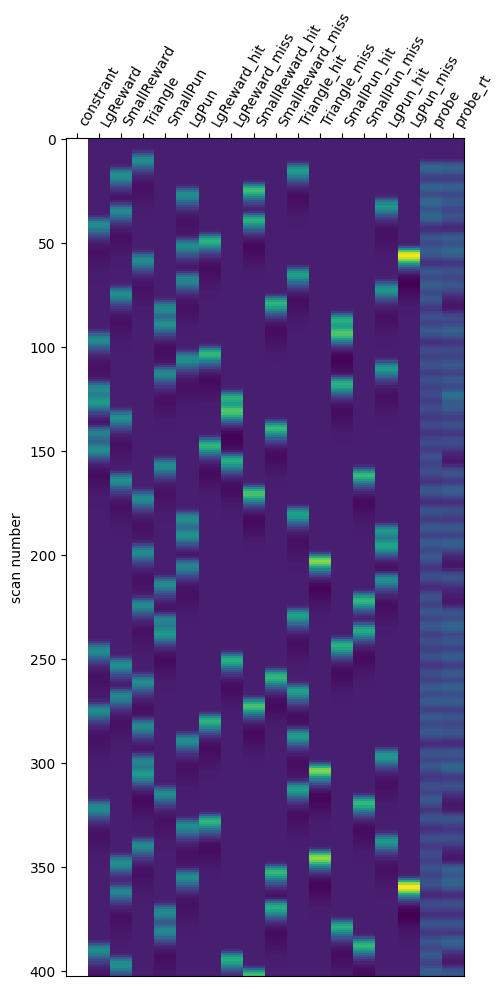

In [11]:
design_events.to_csv(f'{dir_out}/design_events_df.csv', index=False)
plotting.plot_design_matrix(design_matrix_mid)

In [12]:
contrast_labs = {
    # Anticipation
    'LRew-Neut': 'LgReward - Triangle',
    'ARew-Neut': 'LgReward + SmallReward - 2*Triangle',
    'LPun-Neut': 'LgPun - Triangle',
    'APun-Neut': 'LgPun + SmallPun - 2*Triangle',

    # Feedback
    'ARewHit-ARewMiss': 'LgReward_hit + SmallReward_hit - LgReward_miss - SmallReward_miss',
    'LRewHit-LRewMiss': 'LgReward_hit - LgReward_miss',
    'APunHit-APunMiss': 'LgPun_hit + SmallPun_hit - LgPun_miss - SmallPun_miss',
    'LPunHit-LPunMiss': 'LgPun_hit - LgPun_miss',
    'LRewHit-LNeutHit': 'LgReward_hit - Triangle_hit',

    #probe
    'probe-base': 'probe',
    'rt-base': 'probe_rt'

}

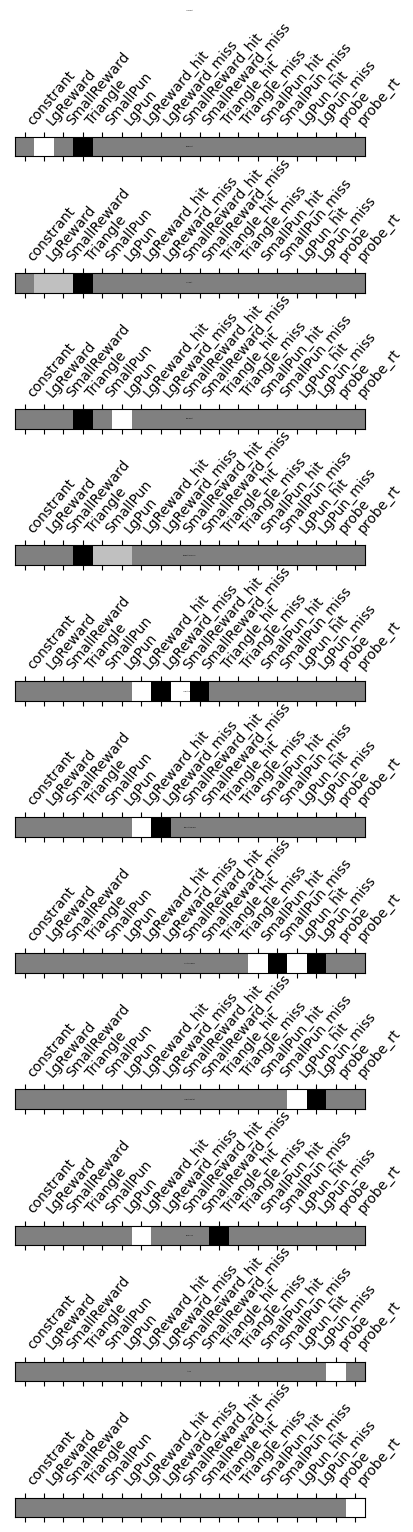

In [14]:
fig, axes = plt.subplots(nrows=len(contrast_labs), ncols=1, figsize=(400, 40))

# Plot each contrast matrix on a separate subplot
for i, (key, values) in enumerate(contrast_labs.items()):
    ax = axes[i]  # Select the appropriate subplot
    plotting.plot_contrast_matrix(values, design_matrix=design_matrix_mid, ax=ax)
    ax.set_title(key, fontsize=.0005)  # Set title for each subplot with smaller font size
plt.subplots_adjust(hspace=6)  # Add space between subplots
plt.show()

In [33]:
vals = design_matrix_mid.columns.values
print(' '.join(vals))

constrant LgReward SmallReward Triangle SmallPun LgPun LgReward_hit LgReward_miss SmallReward_hit SmallReward_miss Triangle_hit Triangle_miss SmallPun_hit SmallPun_miss LgPun_hit LgPun_miss probe probe_rt


In [34]:
for i, (key, values) in enumerate(contrast_labs.items()):
    print(key,'\n',expression_to_contrast_vector(values, design_columns=design_matrix_mid.columns))

LRew-Neut 
 [ 0.  1.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
ARew-Neut 
 [ 0.  1.  1. -2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
LPun-Neut 
 [ 0.  0.  0. -1.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
APun-Neut 
 [ 0.  0.  0. -2.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
ARewHit-ARewMiss 
 [ 0.  0.  0.  0.  0.  0.  1. -1.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
LRewHit-LRewMiss 
 [ 0.  0.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
APunHit-APunMiss 
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  1. -1.  0.  0.]
LPunHit-LPunMiss 
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1. -1.  0.  0.]
LRewHit-LNeutHit 
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
probe-base 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
rt-base 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
